# Weather Analysis Playground

Welcome! This notebook is your interactive playground for fetching real-time weather data from the Foreca API and creating visualizations.

**How to use:** Run each cell one by one by pressing `Shift + Enter`.

### Step 1: Load Libraries and API Keys

First, we import the necessary libraries and securely load your API credentials from the `.env` file.

In [6]:
import os
from dotenv import load_dotenv
import pandas as pd
import plotly.express as px
from api_integrations.foreca_weather_api import ForecaWeatherAPI

# Load the .env file from the current directory
load_dotenv()

api_username = os.getenv("FORECA_API_USERNAME")
api_password = os.getenv("FORECA_API_PASSWORD")

print("✅ Setup complete.")

✅ Setup complete.


### Step 2: Connect to the Foreca API

Now, let's create our API client. It will handle authentication for us automatically.

In [2]:
if not api_username or not api_password:
    print("❌ Error: API credentials not found in .env file!")
else:
    api = ForecaWeatherAPI(username=api_username, password=api_password)
    print("🌤️ Successfully connected to Foreca API.")

INFO:api_integrations.foreca_weather_api:ForecaWeatherAPI initialized.


🌤️ Successfully connected to Foreca API.


### Step 3: Find a Location ID

To get a forecast, we first need the unique ID for a city. Let's search for **Mecca**.

In [11]:
locations_df = pd.DataFrame(api.search_location("Madina", country="SA"))
locations_df

INFO:api_integrations.foreca_weather_api:Found 1 locations for query: 'Madina'.


,id,name,country,timezone,language,adminArea,adminArea2,adminArea3,lon,lat
0,100109223,Medina,Saudi Arabia,Asia/Riyadh,en,Medina Region,None,None,39.6142,24.4686


The ID for Mecca is `100104515`. Let's save it.

In [12]:
location_id = 100109223

### Step 4: Get the Weather Forecast

Now we can use the ID to fetch the 7-day daily forecast.

In [13]:
daily_forecast = api.get_daily_forecast(location_id, periods=7)
daily_forecast

INFO:api_integrations.foreca_weather_api:Retrieved daily forecast for location ID 100109223.


,date,symbol,maxTemp,minTemp,precipAccum,maxWindSpeed,windDir
0,2025-06-22,d100,43,28,0,5,283
1,2025-06-23,d000,43,27,0,6,282
2,2025-06-24,d000,42,27,0,7,273
3,2025-06-25,d000,42,27,0,7,273
4,2025-06-26,d000,42,27,0,7,275
5,2025-06-27,d000,42,27,0,5,296
6,2025-06-28,d000,42,27,0,6,283


### Step 5: Create Interactive Graphs

This is the fun part! Let's visualize the data with Plotly.

#### Graph 1: Daily High and Low Temperatures

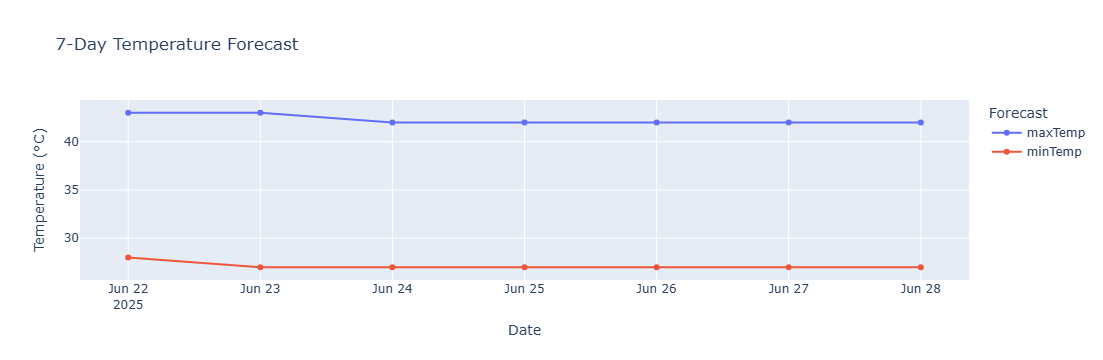

In [14]:
fig_temp = px.line(
    daily_forecast, 
    x='date', 
    y=['maxTemp', 'minTemp'], 
    title='7-Day Temperature Forecast',
    labels={'date': 'Date', 'value': 'Temperature (°C)', 'variable': 'Forecast'},
    markers=True
)
fig_temp.show()

#### Graph 2: Daily Precipitation

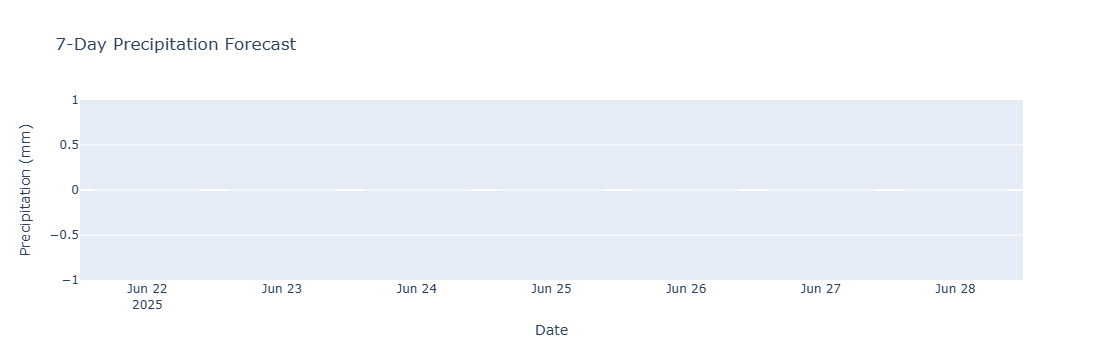

In [10]:
fig_precip = px.bar(
    daily_forecast,
    x='date',
    y='precipAccum',
    title='7-Day Precipitation Forecast',
    labels={'date': 'Date', 'precipAccum': 'Precipitation (mm)'}
)
fig_precip.show()

### Your Turn to Experiment!

This notebook is your playground. Try these ideas:

- **Change the city**: In Step 3, change `"Mecca"` to your hometown or any other city.
- **Fetch hourly data**: Use `api.get_hourly_forecast(location_id)` to get more detailed data.
- **Create new plots**: Can you visualize `maxWindSpeed`?